In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score 

In [2]:
##https://www.kaggle.com/datasets/nitinchoudhary012/algerian-forest-fires-dataset/data

In [3]:
data=pd.read_csv("4-Algerian_forest_fires_dataset.csv")

In [4]:
#DATA CLEANING

In [5]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [8]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
data[data.isnull().any(axis=1)] #nanrow

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
data.shape

(247, 14)

In [11]:
data.drop(122,inplace=True)

In [12]:
data.loc[:123,"Region"]=0
data.loc[123:,"Region"]=1

In [13]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [14]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [15]:
data=data.dropna().reset_index(drop=True)

In [16]:
#VALUE TYPES

In [17]:
data.columns=data.columns.str.strip()

In [18]:
data["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [19]:
data[data["day"]=="day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [20]:
data.drop(122,inplace=True)

In [21]:
data[["day","month","year","Temperature","RH","Ws"]]=data[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [23]:
data[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]]=data[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [25]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
#FEATURE ENGİNEERİNG

In [27]:
data["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [28]:
data["Classes"]=np.where(data["Classes"].str.contains("not fire"),0,1)

In [29]:
data["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [30]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


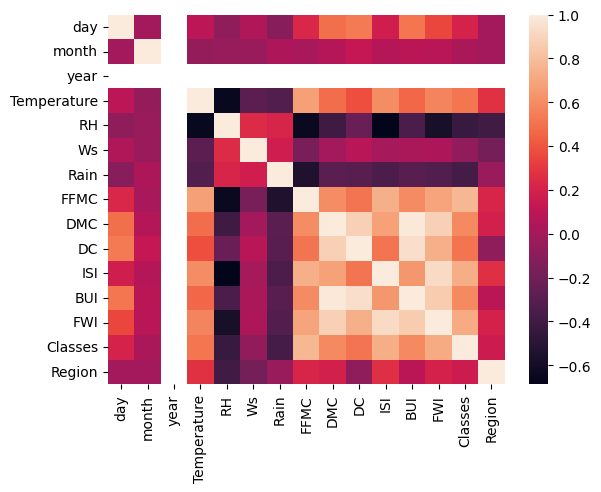

In [31]:
sns.heatmap(data.corr())
plt.show()

In [32]:
data.drop(["day","month","year"],axis=1,inplace=True)

In [33]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [34]:
#HIGHLY CORRELATED COLUMNS

In [35]:
#dependent&independent features

In [36]:
X=data.drop("FWI",axis=1)
y=data["FWI"]

In [37]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [38]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [41]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [42]:
 #redundancy,multicollininearity,overfitting

In [44]:
def correlationfordrop(data,threshold):  
    columnstodrop=set()
    corr=data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                columnstodrop.add(corr.columns[i])
    return columnstodrop
      


In [45]:
coldrop=correlationfordrop(X_train,0.80)
coldrop

{'BUI', 'DC'}

In [46]:
X_train.drop(coldrop,axis=1,inplace=True)
X_test.drop(coldrop,axis=1,inplace=True)

In [47]:
X_train.shape

(182, 9)

In [48]:
X_test.shape

(61, 9)

In [49]:
#COMPARISON WITH DIFFERENT REGRESSIONS


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

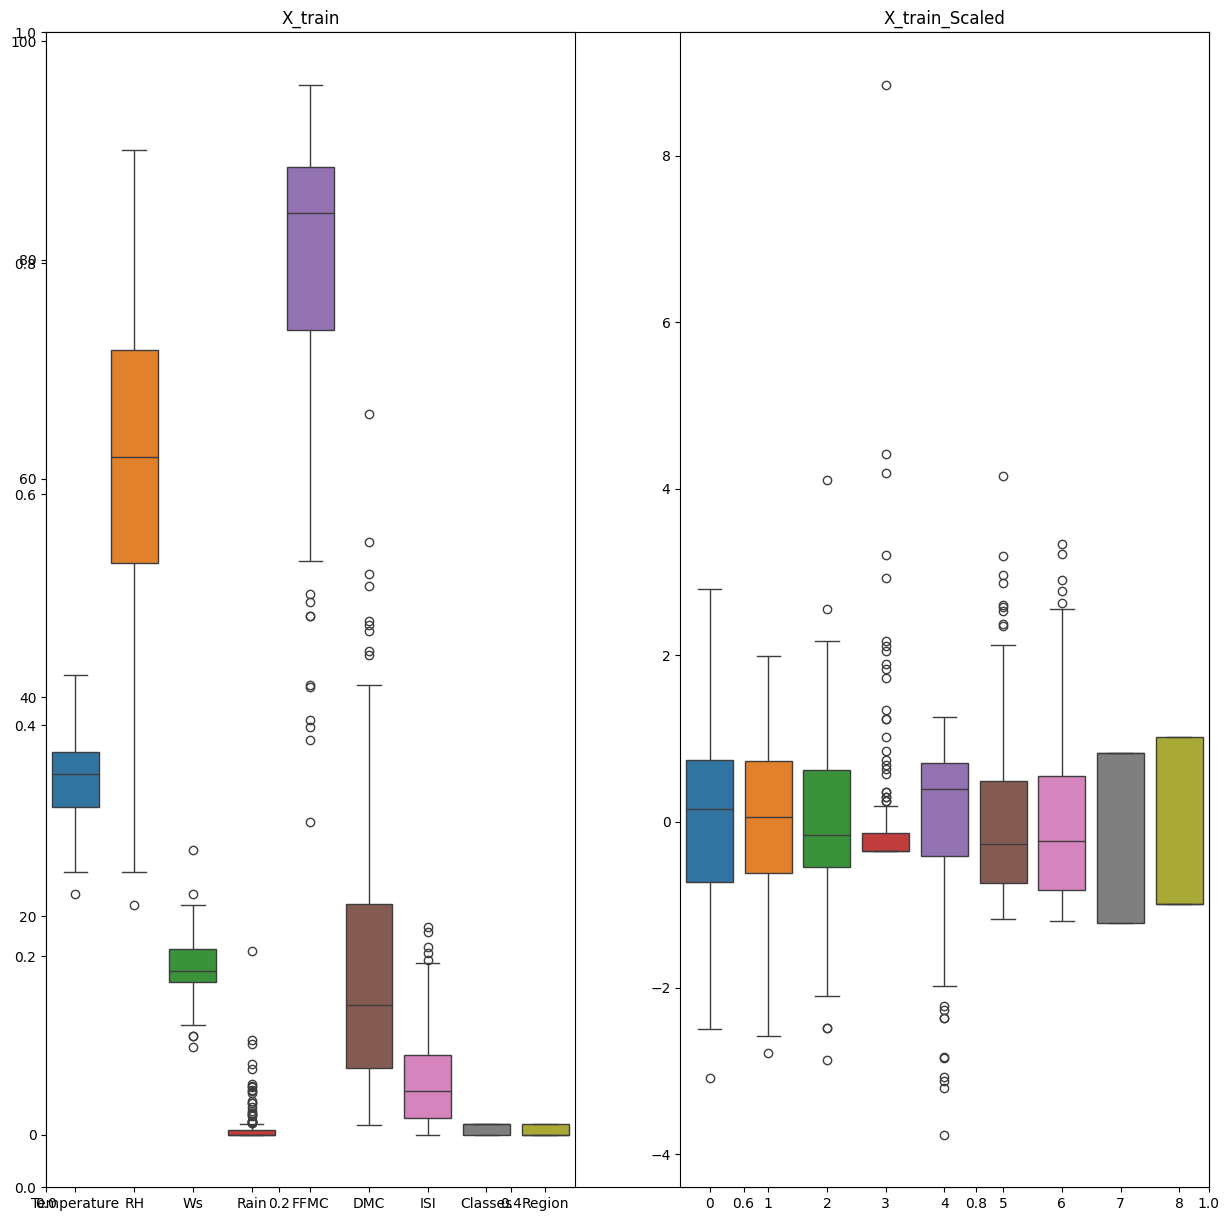

In [50]:
plt.subplots(figsize=(15,15))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_Scaled")
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


Mae: 0.7036011729575921
Mse: 0.8764163698605981
R2: 0.9838729275348057


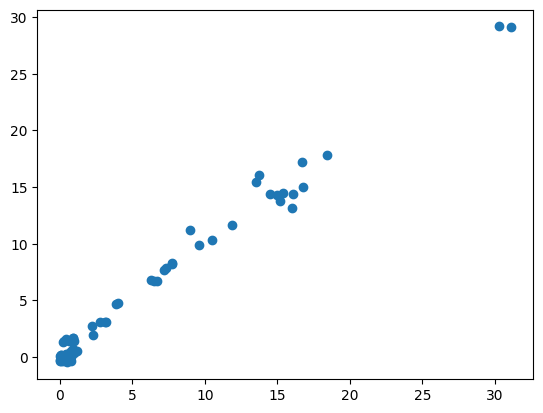

In [52]:
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

Mae: 1.216272633800629
Mse: 2.6029377368132196
R2: 0.9521029422229386


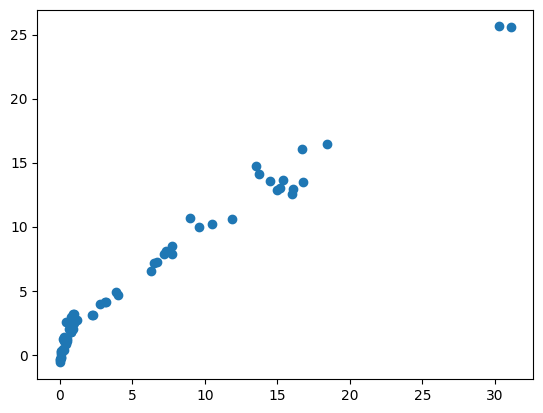

In [53]:
from sklearn.linear_model import Lasso
Lasso=Lasso()
Lasso.fit(X_train_scaled,y_train)
y_pred=Lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

Mae: 0.7093542448703333
Mse: 0.8868348464263109
R2: 0.9836812155445575


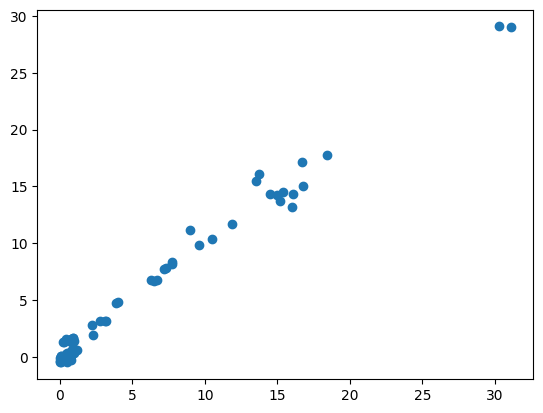

In [54]:
from sklearn.linear_model import Ridge
Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred=Ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

Mae: 1.749328647109016
Mse: 5.569160502382824
R2: 0.8975210207375391


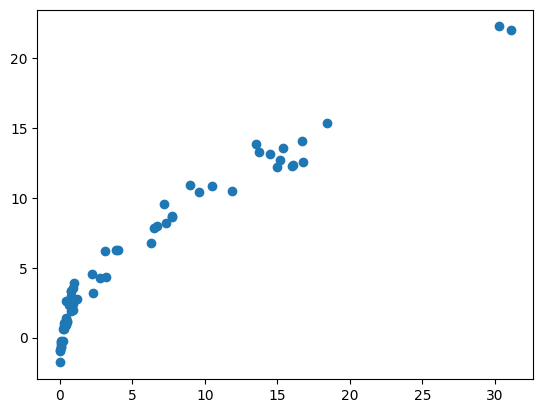

In [55]:
from sklearn.linear_model import ElasticNet
Elastic=ElasticNet()
Elastic.fit(X_train_scaled,y_train)
y_pred=Elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

In [56]:
#CROSS VALİDATİON AND ALPHA VALUES

Mae: 0.7222308156305418
Mse: 0.8972011670293636
R2: 0.9834904632842026


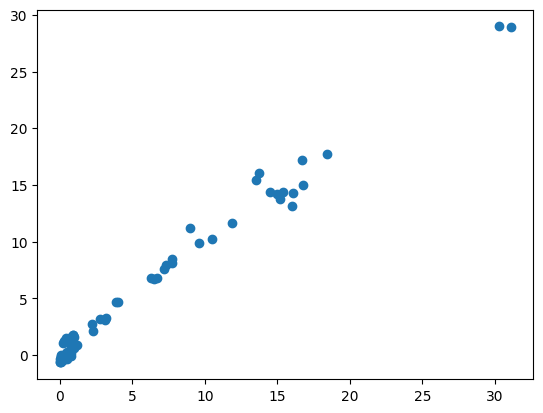

In [57]:
#lassocrosvalidation
from sklearn.linear_model import LassoCV


Lassocv=LassoCV(cv=5)
Lassocv.fit(X_train_scaled,y_train)
y_pred=Lassocv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

In [58]:
Lassocv.alpha_

np.float64(0.031548475118595085)

In [59]:
Lassocv.alphas_

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

Mae: 0.7093542448703333
Mse: 0.8868348464263109
R2: 0.9836812155445575


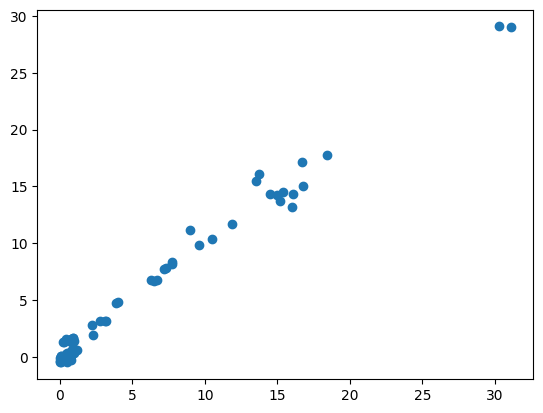

In [60]:
#ridge cross validatiom
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()

Mae: 0.7354284604918176
Mse: 0.9249125778630378
R2: 0.9829805413498388


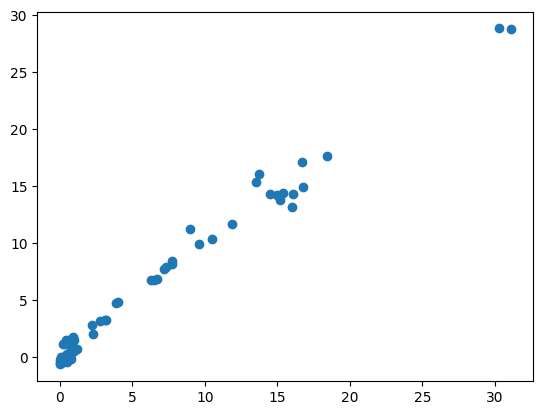

In [61]:
#elasticnet cros validation
from sklearn.linear_model import ElasticNetCV

elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mae:",mae)
print("Mse:",mse)
print("R2:",score)

plt.scatter(y_test,y_pred)
plt.show()